Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Dataset insights
num_instances = df.shape[0]
num_features = df.shape[1] - 1  # Exclude target column
class_counts = df['classification'].value_counts()

print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")
print(f"Class counts:\n{class_counts}")


Number of instances: 100000
Number of features: 34
Class counts:
classification
malware    50000
benign     50000
Name: count, dtype: int64


Preprocess and split the Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Balancing the dataset (assuming 'classification' is the target)
majority_class = df[df['classification'] == 'benign']
minority_class = df[df['classification'] == 'malware']

minority_upsampled = resample(
    minority_class, 
    replace=True, 
    n_samples=len(majority_class), 
    random_state=42
)
balanced_df = pd.concat([majority_class, minority_upsampled])

# Splitting into training and testing
X = balanced_df.drop(columns=['classification'])
y = balanced_df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training instances: {len(X_train)}")
print(f"Testing instances: {len(X_test)}")


Training instances: 70000
Testing instances: 30000


EDA

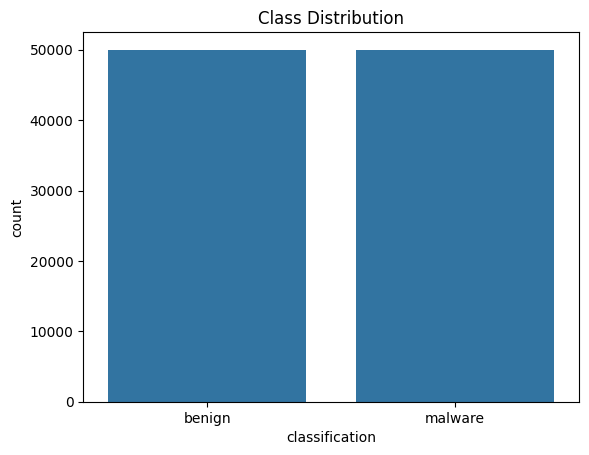

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='classification', data=balanced_df)
plt.title('Class Distribution')
plt.show()




Feature Correlatiom

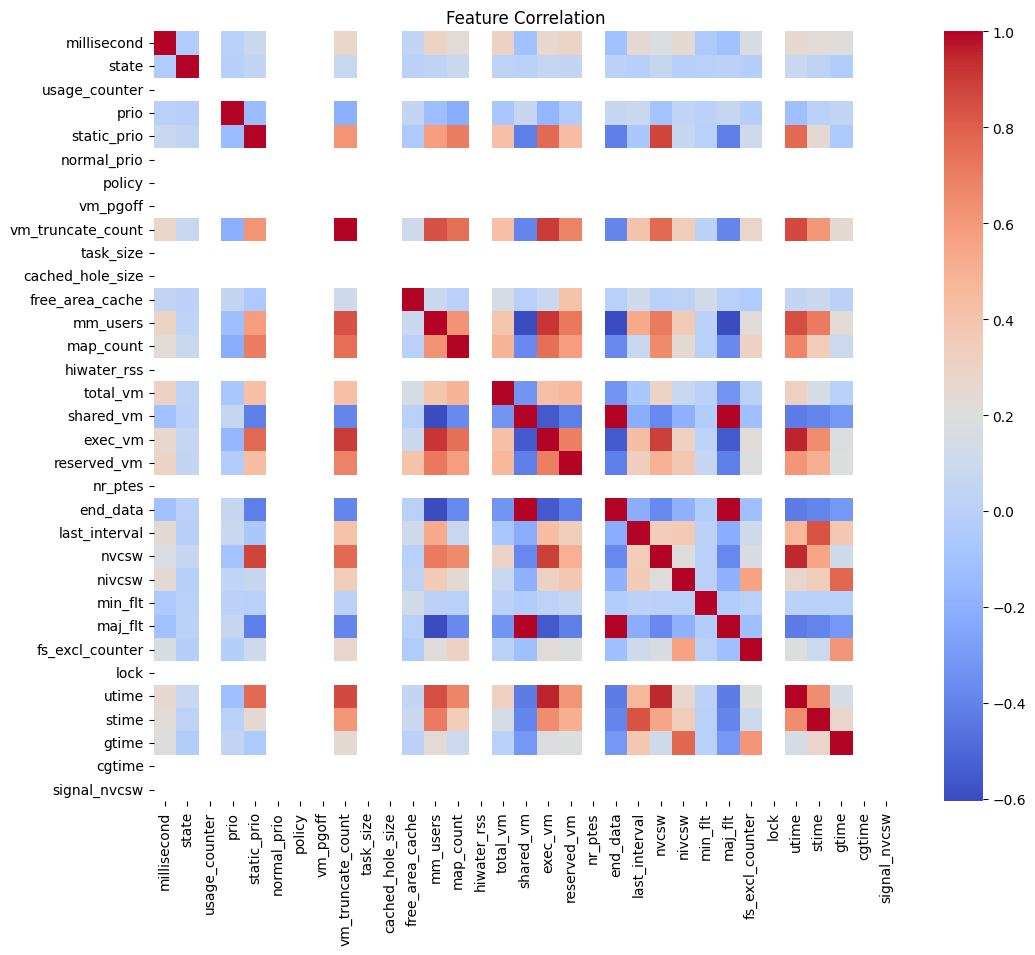

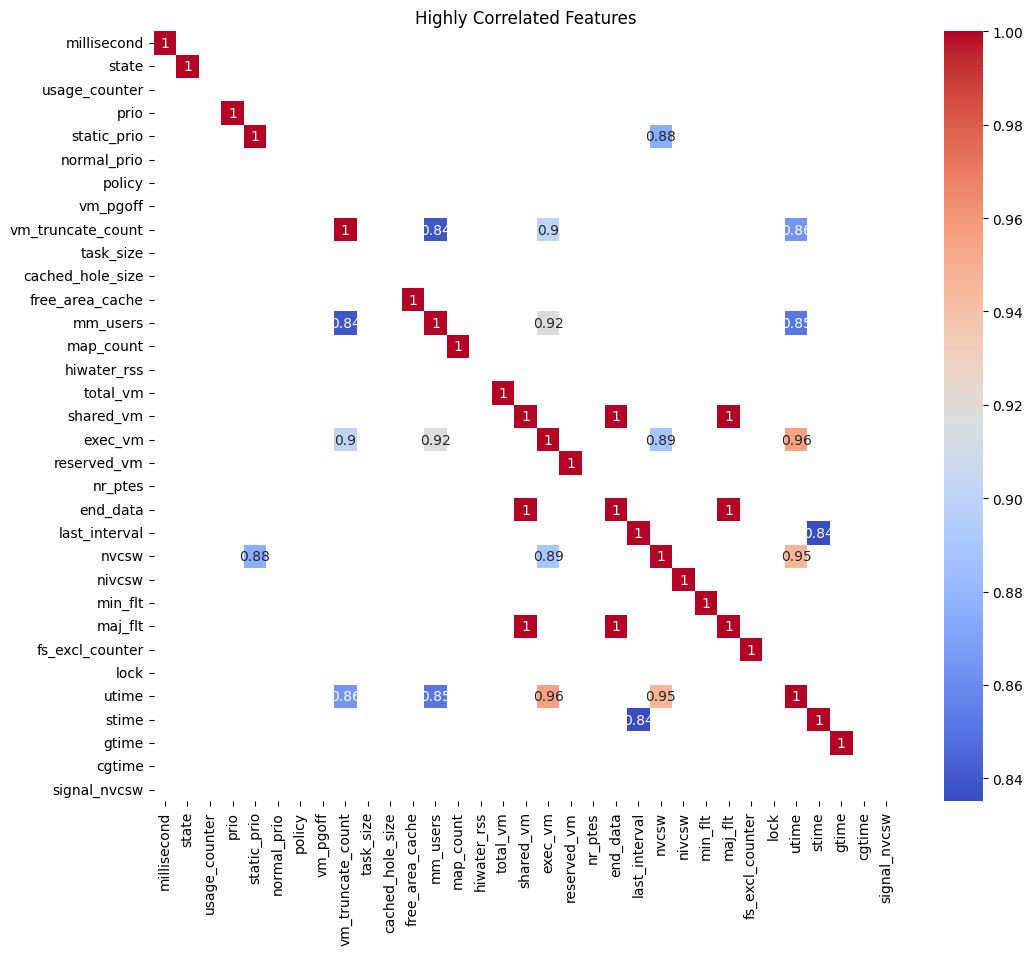

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Adjust the figure size
sns.heatmap(corr, annot=False, cmap='coolwarm')  
plt.title('Feature Correlation')
plt.show()


# Filter correlations above 0.8 or below -0.8
high_corr = corr[(corr > 0.8) | (corr < -0.8)]
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', mask=high_corr.isnull())
plt.title('Highly Correlated Features')
plt.show()




In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column
encoder = LabelEncoder()
balanced_df['classification_encoded'] = encoder.fit_transform(balanced_df['classification'])


Correlation with the Target Variable (Classification)

C:\Users\admin\AppData\Local\Temp\ipykernel_24800\301976951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_corr_df, x='Correlation', y='Feature', palette='coolwarm')


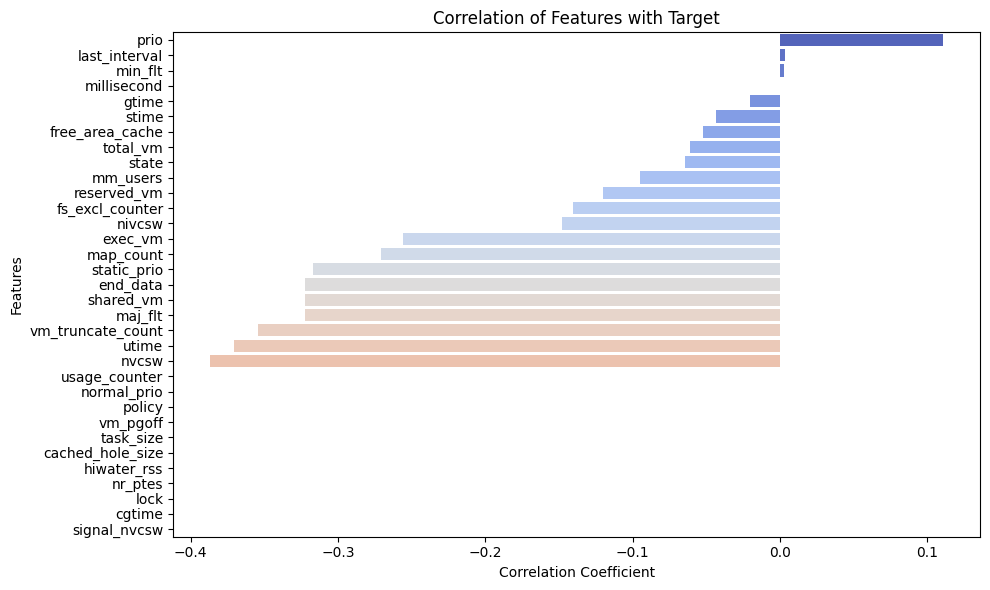

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_corr_df, x='Correlation', y='Feature', palette='coolwarm')
plt.title('Correlation of Features with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


TOP 5 Feature

In [23]:
# Select the top 5 most correlated features
top_5_features = feature_corr_df.head(5)
print("Top 5 most correlated features with the target:")
print(top_5_features)

# Extract the column names of these top features
top_5_feature_names = top_5_features['Feature'].tolist()
top_5_feature_names

Top 5 most correlated features with the target:
          Feature  Correlation
3            prio     0.110830
21  last_interval     0.003297
24        min_flt     0.002851
0     millisecond     0.000041
30          gtime    -0.020667


['prio', 'last_interval', 'min_flt', 'millisecond', 'gtime']

         millisecond         state  usage_counter          prio  \
count  100000.000000  1.000000e+05       100000.0  1.000000e+05   
mean      499.511970  1.580037e+05            0.0  3.069706e+09   
std       288.919562  9.371640e+05            0.0  2.960844e+05   
min         0.000000  0.000000e+00            0.0  3.069190e+09   
25%       249.000000  0.000000e+00            0.0  3.069428e+09   
50%       500.000000  0.000000e+00            0.0  3.069702e+09   
75%       750.000000  4.096000e+03            0.0  3.069956e+09   
max       999.000000  4.326605e+07            0.0  3.070222e+09   

         static_prio  normal_prio    policy  vm_pgoff  vm_truncate_count  \
count  100000.000000     100000.0  100000.0  100000.0      100000.000000   
mean    18187.663780          0.0       0.0       0.0       15311.938080   
std      4610.765408          0.0       0.0       0.0        3263.131866   
min     13988.000000          0.0       0.0       0.0        9695.000000   
25%     14352.00

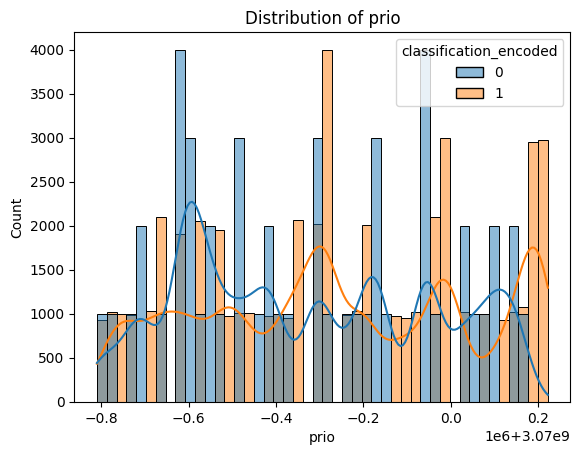

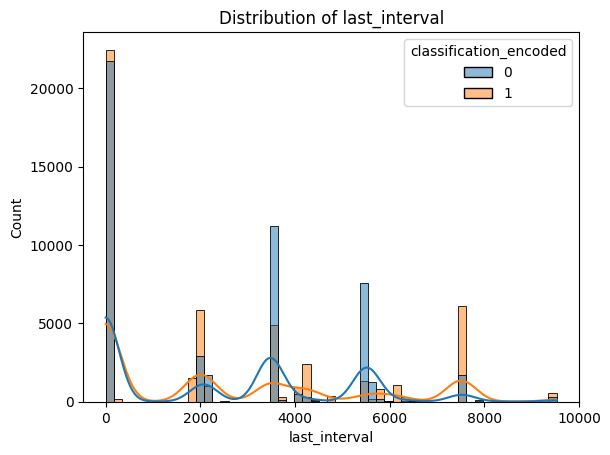

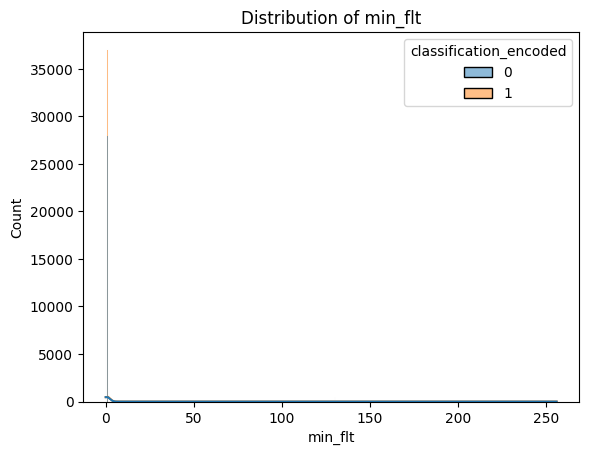

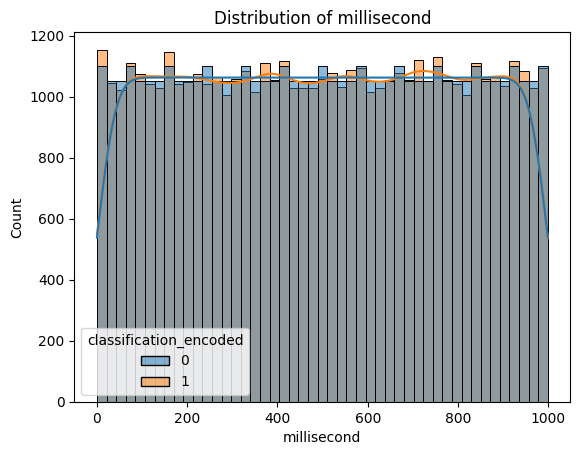

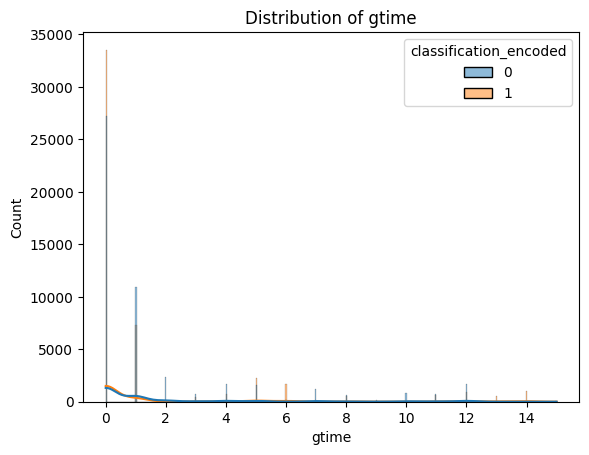

In [21]:
# Summary statistics
print(balanced_df.describe())

# Distribution plots for top features
top_features = feature_corr_df['Feature'].head(5)
for feature in top_features:
    sns.histplot(data=balanced_df, x=feature, hue='classification_encoded', kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


Three Classifier

In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, r2_score
import matplotlib.pyplot as plt

# Train logistic regression with encoded target
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train_encoded)

# Predictions and probabilities
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73     15055
           1       0.71      0.87      0.78     14945

    accuracy                           0.76     30000
   macro avg       0.77      0.76      0.76     30000
weighted avg       0.77      0.76      0.76     30000



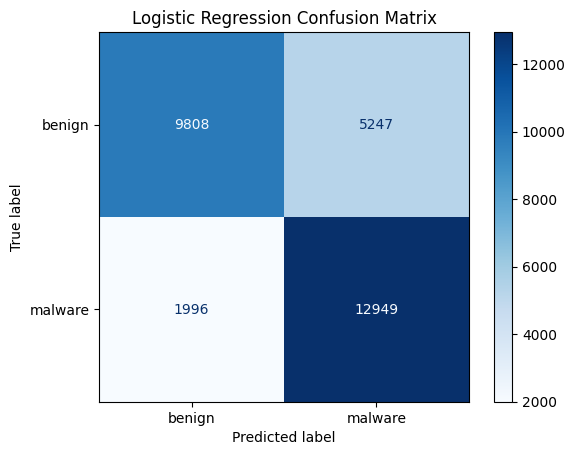

Logistic Regression AUC: 0.821


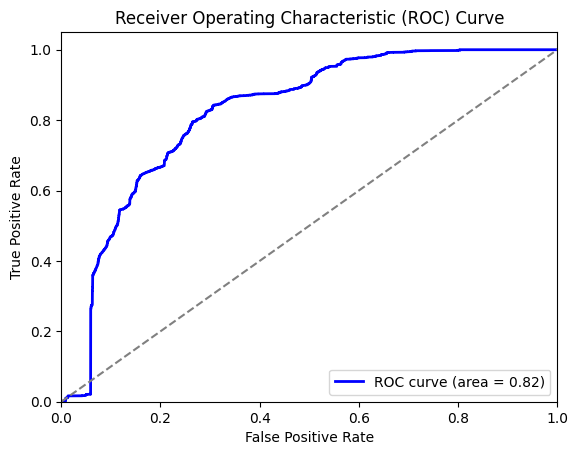

Logistic Regression R2 Score: 0.034


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc, r2_score
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train_encoded)

# Predictions and probabilities
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

print("Logistic Regression Report:\n", classification_report(y_test_encoded, y_pred_logreg))
plot_confusion_matrix(y_test_encoded, y_pred_logreg, "Logistic Regression Confusion Matrix")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob_logreg, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression AUC: {roc_auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# R2 Score
r2 = r2_score(y_test_encoded, y_pred_logreg)
print(f"Logistic Regression R2 Score: {r2:.3f}")


### Random Forest

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     15000
     malware       1.00      1.00      1.00     15000

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



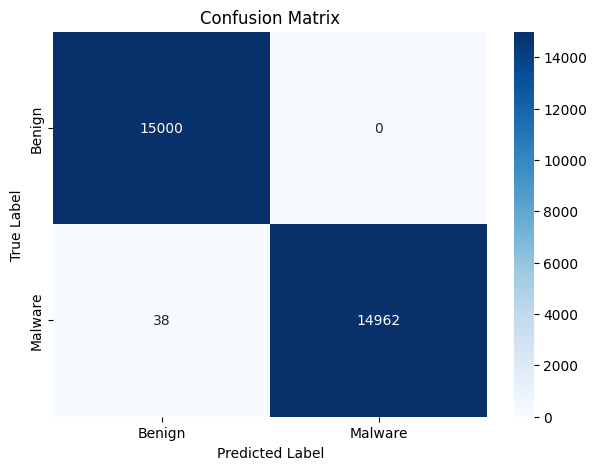

CV Scores: [0.99985714 1.         1.         0.99942857 1.        ]
CV Average Score: 0.9998571428571429


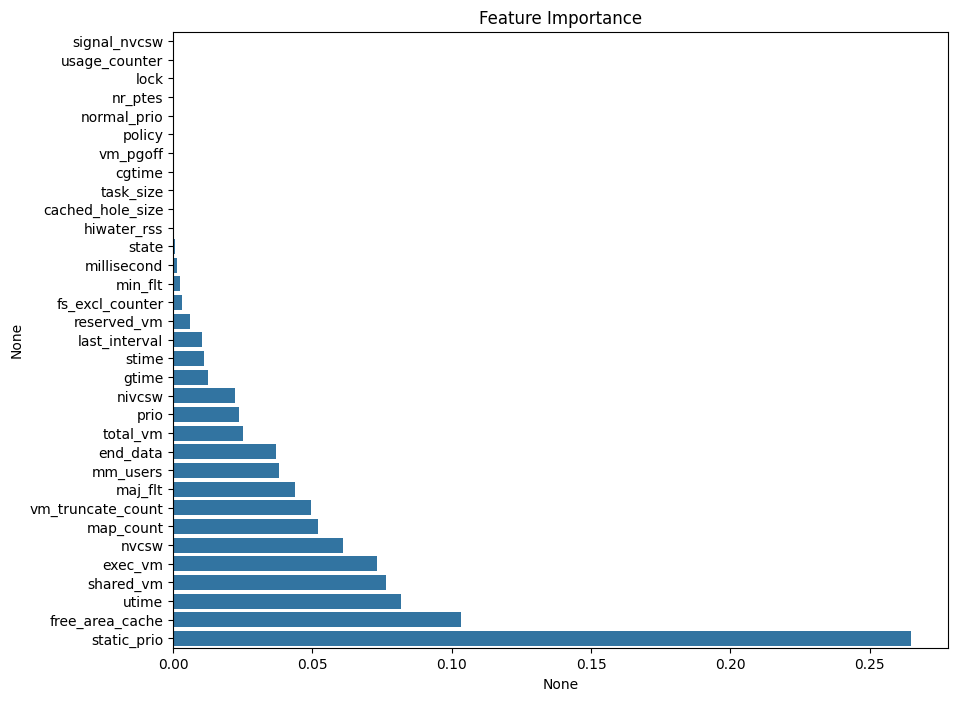

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('dataset.csv') 

# Drop non-informative column 'hash'
data.drop(columns=['hash'], inplace=True)

# Separating features and target
X = data.drop('classification', axis=1)
y = data['classification']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest with basic settings
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation to evaluate model robustness
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("CV Scores:", cv_scores)
print("CV Average Score:", np.mean(cv_scores))

# Feature Importance Visualization
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values()
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance')
plt.show()


### Neural Netwok

Epoch 0, Loss: 0.47300217866058725
Epoch 100, Loss: 0.26940496934833086
Epoch 200, Loss: 0.26443405387579516
Epoch 300, Loss: 0.2644307382988778
Epoch 400, Loss: 0.26443004451960744
Epoch 500, Loss: 0.26442973173356205
Epoch 600, Loss: 0.26442954578976335
Epoch 700, Loss: 0.2644294187755082
Epoch 800, Loss: 0.2644293249652055
Epoch 900, Loss: 0.2644292521837151


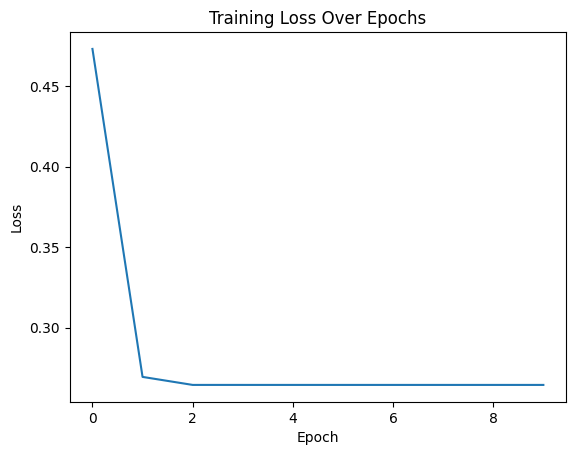

Accuracy: 0.7342
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     15000
           1       1.00      0.47      0.64     15000

    accuracy                           0.73     30000
   macro avg       0.83      0.73      0.71     30000
weighted avg       0.83      0.73      0.71     30000



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Load data
data = pd.read_csv('dataset.csv')

#'hash' is a non-informative column and dropping it
data.drop(columns=['hash'], inplace=True)

# Separating features and target
X = data.drop('classification', axis=1)
y = data['classification'].apply(lambda x: 1 if x == 'malware' else 0).values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network parameters
input_layer_size = X_train_scaled.shape[1]
hidden_layer_size = 20 
output_layer_size = 1
lr = 0.01

# Weight initialization
np.random.seed(42)
weight_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weight_output = np.random.rand(hidden_layer_size, output_layer_size)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training the neural network
losses = []
epochs = 1000  
for epoch in range(epochs):
    # Forward propagation
    input_hidden = np.dot(X_train_scaled, weight_hidden)
    output_hidden = sigmoid(input_hidden)
    input_op = np.dot(output_hidden, weight_output)
    output_op = sigmoid(input_op)

    # Backward propagation
    error = output_op - y_train[:, None]
    derror_douto = error
    douto_dino = sigmoid_der(input_op)
    derror_dwo = np.dot(output_hidden.T, derror_douto * douto_dino)

    derror_dino = derror_douto * douto_dino
    dino_douth = weight_output
    derror_douth = np.dot(derror_dino, dino_douth.T)
    douth_dinh = sigmoid_der(input_hidden)
    derror_dwh = np.dot(X_train_scaled.T, derror_douth * douth_dinh)

    # Updating weights
    weight_hidden -= lr * derror_dwh
    weight_output -= lr * derror_dwo

    # Error visualization
    if epoch % 100 == 0:
        loss = np.mean(np.square(error))
        losses.append(loss)
        print(f'Epoch {epoch}, Loss: {loss}')

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Predictions
hidden_layer_output = sigmoid(np.dot(X_test_scaled, weight_hidden))
final_output = sigmoid(np.dot(hidden_layer_output, weight_output))

# Threshold the outputs
predicted_classes = (final_output > 0.5).astype(int)
accuracy = np.mean(predicted_classes.flatten() == y_test)
print(f'Accuracy: {accuracy}')

# Threshold the neural network's output to get binary predictions
nn_predictions = (final_output > 0.5).astype(int).flatten()

# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))


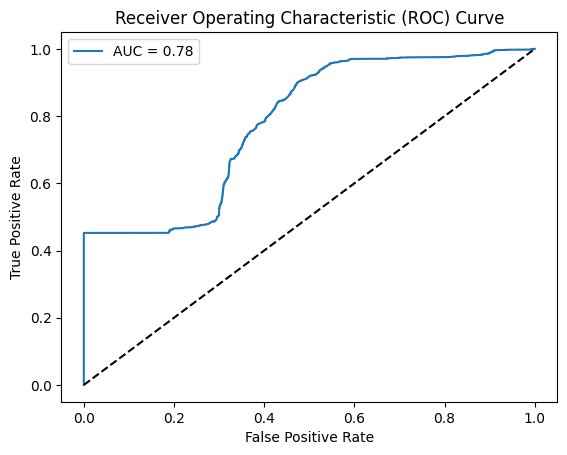

AUC-ROC Score: 0.7811187095781329


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities
hidden_layer_output = sigmoid(np.dot(X_test_scaled, weight_hidden))
final_output = sigmoid(np.dot(hidden_layer_output, weight_output))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, final_output)
auc_score = roc_auc_score(y_test, final_output)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

print(f"AUC-ROC Score: {auc_score}")


### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.46      0.60     15000
           1       0.63      0.94      0.76     15000

    accuracy                           0.70     30000
   macro avg       0.76      0.70      0.68     30000
weighted avg       0.76      0.70      0.68     30000



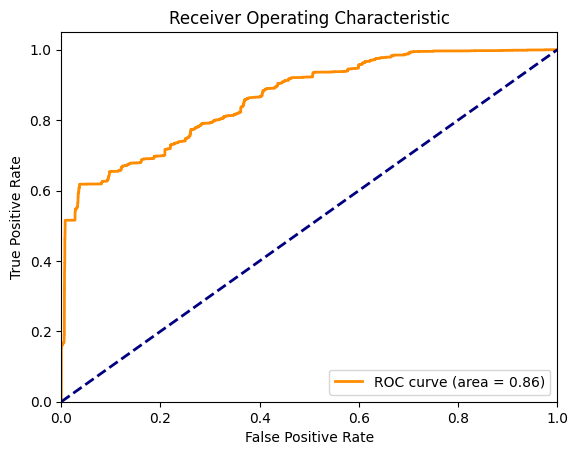

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Load data
data = pd.read_csv('dataset.csv')

#'hash' is a non-informative column and dropping it
data.drop(columns=['hash'], inplace=True)

# Convert 'classification' to a binary variable as it's categorical
data['classification'] = data['classification'].apply(lambda x: 1 if x == 'malware' else 0)

# Separating features and target
X = data.drop('classification', axis=1)
y = data['classification']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
model = gnb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_probs = model.predict_proba(X_test_scaled)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### KNN


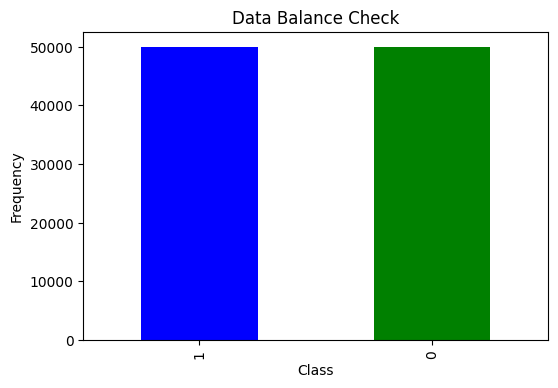

Accuracy for different values of k:
k=1: Accuracy=0.9999
k=2: Accuracy=0.9999
k=3: Accuracy=0.9999
k=4: Accuracy=0.9998
k=5: Accuracy=0.9998
k=6: Accuracy=0.9997
k=7: Accuracy=0.9997
k=8: Accuracy=0.9996
k=9: Accuracy=0.9995
k=10: Accuracy=0.9994
k=11: Accuracy=0.9994
k=12: Accuracy=0.9994
k=13: Accuracy=0.9994
k=14: Accuracy=0.9994
k=15: Accuracy=0.9993
k=16: Accuracy=0.9993
k=17: Accuracy=0.9994
k=18: Accuracy=0.9993
k=19: Accuracy=0.9990
k=20: Accuracy=0.9991
k=21: Accuracy=0.9989
k=22: Accuracy=0.9990
k=23: Accuracy=0.9990
k=24: Accuracy=0.9989
k=25: Accuracy=0.9988


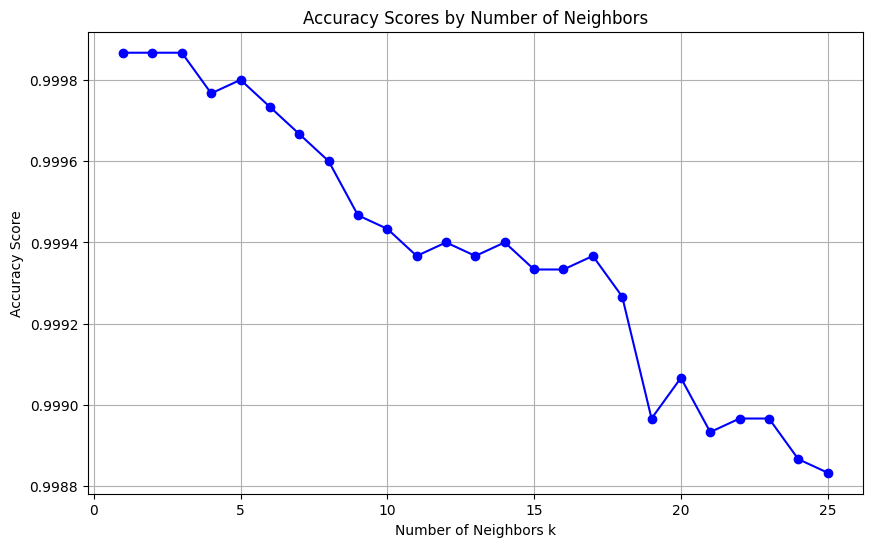

KNN Classification Report (k=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14969
           1       1.00      1.00      1.00     15031

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('dataset.csv')

#'hash' is a non-informative column and dropping it
data.drop(columns=['hash'], inplace=True)

# Convert 'classification' to binary (assuming binary classification)
data['classification'] = data['classification'].apply(lambda x: 1 if x == 'malware' else 0)

# Data Balance Check
plt.figure(figsize=(6, 4))
data['classification'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Data Balance Check')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Separating features and target
X = data.drop('classification', axis=1)
y = data['classification']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize range for k
k_range = range(1, 26)

# List to store scores
scores = []

# Loop through different values of k and print accuracy for each k
print("Accuracy for different values of k:")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"k={k}: Accuracy={accuracy:.4f}")

# Plotting Accuracy Scores for Different k-values
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy Scores by Number of Neighbors')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()
# Identify the best k based on maximum accuracy
best_k_index = np.argmax(scores)  # `scores` is the list of accuracies from your loop
best_k = k_range[best_k_index]

# Train the model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Predict on the test set
best_knn_predictions = best_knn.predict(X_test_scaled)

# Generate classification report
from sklearn.metrics import classification_report
print(f"KNN Classification Report (k={best_k}):")
print(classification_report(y_test, best_knn_predictions))

